# Explore high RSEI score in Harris County, Texas

After some exploration in QGIS, I found that Harris County, Texas has the highest RSEI score of any county in the US. Now I want to bring in the original data, and try to get some more specifics about exactly what chemicals in Harris County are causing this high RSEI score. 

In [66]:
# import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
import numpy as np

import warnings
warnings.simplefilter(action='ignore')

# supress scientific notation for easier viewing
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# set options to view all columns in output
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

Going back to the [EasyRSEI Dashboard](https://edap.epa.gov/public/extensions/EasyRSEI/EasyRSEI.html), I searched for data from facilities in Harris County, Texas for the year 2018 to get some more specific information. This search gave me a breakdown of RSEI score by release type, and released chemical.

In [60]:
# read in table showing RSEI score breakdown by release type
release = pd.read_excel('../data/rsei-tables/2018-harris-county-release-type.xlsx')
release.sort_values(by=['RSEI_score'], ascending=False)

,Year,Media,RSEI_score
0,2018,Air Releases,66071317.33924
2,2018,Transfers to POTWs,1942122.30857
3,2018,Off-Site Incineration,520817.10500
1,2018,Direct Water Releases,82902.48571


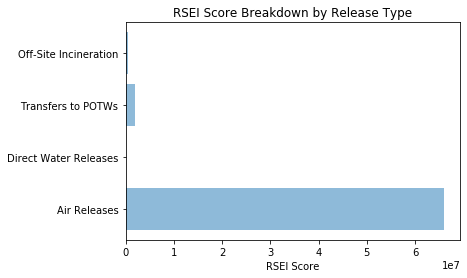

In [61]:
# plot bar chart to see distribution
# the vast majority of the RSEI score comes by air release

media = (release['Media'].tolist())
score = (release['RSEI_score'].tolist())

plt.barh(media, score, align='center', alpha=0.5)
plt.xlabel('RSEI Score')
plt.title('RSEI Score Breakdown by Release Type');

In [62]:
# read in table showing RSEI score breakdown by chemical
# the vast majority of the RSEI score comes by air release
chemical = pd.read_excel('../data/rsei-tables/2018-harris-county-chemical-release.xlsx')
chemical.sort_values(by=['RSEI_score'], ascending=False)

,SortName,RSEI_score
0,Ethylene oxide,42701912.20962
1,Nickel and nickel compounds,8180480.61455
2,Chromium and chromium compounds,3777892.40610
3,Cobalt and cobalt compounds,3613456.50000
4,"Butadiene, 1,3-",2980664.27497
5,Propyleneimine,2836930.00000
10,Others,2371642.91948
6,Benzene,981868.46017
7,"Dichloroethane, 1,2-",512500.80840
8,Diaminotoluene (mixed isomers),445090.92393


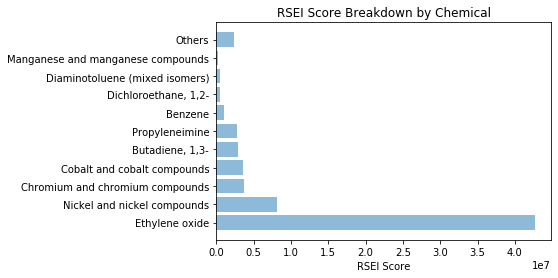

In [63]:
# plot bar chart to see distribution
# the vast majority of the RSEI score comes from ethylene oxide

name = (chemical['SortName'].tolist())
score = (chemical['RSEI_score'].tolist())

plt.barh(name, score, align='center', alpha=0.5)
plt.xlabel('RSEI Score')
plt.title('RSEI Score Breakdown by Chemical');


Now that I have determined Ethylene oxide released into the air is the biggest risk posed in Harris County, I want to wrangle the TRI data set to find out where exactly the chemical is coming from. Ethylene oxide is carcinogenic through the inhalation route of exposure.

In [131]:
# read data in
df_in = pd.read_excel('../data/TRI-2018-US.xlsx')

# create copy of original data
df = df_in.copy()

In [132]:
# copying from initial exploration notebook
# drop columns I do not need
df = df.drop(['18. SIC 2',
 '19. SIC 3',
 '20. SIC 4',
 '21. SIC 5',
 '22. SIC 6',
 '24. NAICS 2',
 '25. NAICS 3',
 '26. NAICS 4',
 '27. NAICS 5',
 '28. NAICS 6',
 '32. SRS ID',
 '38. FORM TYPE',
 '55. 6.1 - POTW - TRNS RLSE',
 '56. 6.1 - POTW - TRNS TRT',
 '57. POTW - TOTAL TRANSFERS',
 '58. 6.2 - M10',
 '59. 6.2 - M41',
 '60. 6.2 - M62',
 '61. 6.2 - M40 METAL',
 '62. 6.2 - M61 METAL',
 '63. 6.2 - M71',
 '64. 6.2 - M81',
 '65. 6.2 - M82',
 '66. 6.2 - M72',
 '67. 6.2 - M63',
 '68. 6.2 - M66',
 '69. 6.2 - M67',
 '70. 6.2 - M64',
 '71. 6.2 - M65',
 '72. 6.2 - M73',
 '73. 6.2 - M79',
 '74. 6.2 - M90',
 '75. 6.2 - M94',
 '76. 6.2 - M99',
 '78. 6.2 - M20',
 '79. 6.2 - M24',
 '80. 6.2 - M26',
 '81. 6.2 - M28',
 '82. 6.2 - M93',
 '84. 6.2 - M56',
 '85. 6.2 - M92',
 '87. 6.2 - M40 NON-METAL',
 '88. 6.2 - M50',
 '89. 6.2 - M54',
 '90. 6.2 - M61 NON-METAL',
 '91. 6.2 - M69',
 '92. 6.2 - M95'], axis=1)

In [133]:
# remove leading numbers, periods, and space and from column names
df.columns = df.columns.str.lstrip('0123456789.- ')

In [134]:
df.sample(5)

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,...,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM
34341,2018,98837TKTMS9255R,110000491174,JOYSON SAFETY SYSTEMS ACQUISITION LLC,9138 RANDOLPH RD NE,MOSES LAKE,GRANT,WA,98837,NaN,...,0.0,0.0,0.0,0.0,426.0,NaN,PRODUCTION,0.25,JOYSON SAFETY SYSTEMS ACQUISITION LLC,81080246
31510,2018,60623BLLCT2001S,110000434664,ABLE ELECTROPOLISHING CO INC,2001 S KILBOURN AVE,CHICAGO,COOK,IL,60623,NaN,...,0.0,0.0,0.0,0.0,6.0,NaN,PRODUCTION,1.27,NaN,NaN
73349,2018,38109MPCPT543WE,110000374087,VALERO REFINING CO - TENNESSEE LLC,2385 RIVERPORT ROAD,MEMPHIS,SHELBY,TN,38109,NaN,...,0.0,0.0,60000.0,0.0,60010.0,NaN,PRODUCTION,1.00,VALERO ENERGY CORP,199623414
17417,2018,41008DWCRNUSHIG,110056956511,DOW SILICONES CORP,4770 US HWY 42,CARROLLTON,CARROLL,KY,41008,NaN,...,0.0,0.0,4700000.0,0.0,4710790.0,NaN,PRODUCTION,0.90,THE DOW CHEMICAL CO,1381581
14282,2018,57216NRTHR48416,110020518992,POET BIOREFINING-BIG STONE LLC,48416 144TH ST,BIG STONE CITY,GRANT,SD,57216,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,NaN,NaN


In [136]:
# isolate all records that release ethylene oxide in Harris County TX
harris = df.loc[(df['CHEMICAL'] == 'ETHYLENE OXIDE') & (df['ST'] == 'TX') & (df['COUNTY'] == 'HARRIS')]

harris.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,...,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM
80,2018,7750WSLVYS5761U,110067200460,SOLVAY USA INC PASADENA TX PLANT,5761 UNDERWOOD RD SUITE B,PASADENA,HARRIS,TX,77507,NaN,...,0.0,0.0,0.0,0.00,138.04,NaN,PRODUCTION,1.07,SOLVAY USA INC,874748937
172,2018,77530RCCHM2502S,110000463221,LYONDELL CHEMICAL CO,2502 SHELDON RD,CHANNELVIEW,HARRIS,TX,77530,NaN,...,0.0,0.0,168650.0,0.00,171751.00,NaN,PRODUCTION,1.05,LYONDELLBASELL INDUSTRIES,194123154
10858,2018,77507QSTRC5761U,110000506079,EQUISTAR CHEMICALS BAYPORT CHEMICALS PLANT,5761 UNDERWOOD RD,PASADENA,HARRIS,TX,77507,NaN,...,0.0,0.0,2718.0,4672.85,12312.00,8977.0,PRODUCTION,1.00,LYONDELLBASELL INDUSTRIES,194123154
14195,2018,77532KMCNC16503,110000463249,KMCO CROSBY PLANT,16503 RAMSEY RD,CROSBY,HARRIS,TX,77532,NaN,...,0.0,0.0,7159.0,0.00,7489.00,7.0,ACTIVITY,0.55,KMCO LLC,74198961
18213,2018,77053WTCRG15200,110000461884,AKZO NOBEL SURFACE CHEMISTRY LLC,15200 ALMEDA RD,HOUSTON,HARRIS,TX,77053,NaN,...,0.0,0.0,109809.0,0.00,109922.00,NaN,PRODUCTION,0.93,AKZO NOBEL INC,62999347


In [137]:
# calculate total air release column
harris['TOTAL_AIR_RELEASE'] = harris['FUGITIVE AIR'] + harris['STACK AIR']

list(harris.columns)

['YEAR',
 'TRIFD',
 'FRS ID',
 'FACILITY NAME',
 'STREET ADDRESS',
 'CITY',
 'COUNTY',
 'ST',
 'ZIP',
 'BIA',
 'TRIBE',
 'LATITUDE',
 'LONGITUDE',
 'FEDERAL FACILITY',
 'INDUSTRY SECTOR CODE',
 'INDUSTRY SECTOR',
 'PRIMARY SIC',
 'PRIMARY NAICS',
 'DOC_CTRL_NUM',
 'CHEMICAL',
 'CAS #/COMPOUND ID',
 'CLEAN AIR ACT CHEMICAL',
 'CLASSIFICATION',
 'METAL',
 'METAL CATEGORY',
 'CARCINOGEN',
 'UNIT OF MEASURE',
 'FUGITIVE AIR',
 'STACK AIR',
 'WATER',
 'UNDERGROUND',
 'UNDERGROUND CL I',
 'UNDERGROUND C II-V',
 'LANDFILLS',
 'A - RCRA C LANDFILL',
 'B - OTHER LANDFILLS',
 'LAND TREATMENT',
 'SURFACE IMPNDMNT',
 'A - RCRA SURFACE IM',
 'B - OTHER SURFACE I',
 'OTHER DISPOSAL',
 'ON-SITE RELEASE TOTAL',
 'OFF-SITE RELEASE TOTAL',
 'OFF-SITE RECYCLED TOTAL',
 'OFF-SITE ENERGY RECOVERY T',
 'OFF-SITE TREATED TOTAL',
 'UNCLASSIFIED',
 'TOTAL TRANSFER',
 'TOTAL RELEASES',
 'RELEASES',
 'A - ON-SITE CONTAINED',
 'B - ON-SITE OTHER ',
 'C - OFF-SITE CONTAIN',
 'D - OFF-SITE OTHER R',
 'ENERGY RECOVE

In [139]:
# create new dataframe by filtering certain columns
harris_filter = harris.filter(['TRIFD', 'FACILITY NAME', 'STREET ADDRESS', 'CITY', 'COUNTY', 'ST', 'ZIP', 'LATITUDE', 'LONGITUDE', 'INDUSTRY SECTOR', 'TOTAL_AIR_RELEASE', 'ON-SITE RELEASE TOTAL', 'OFF-SITE RELEASE TOTAL', 'TOTAL RELEASES'])
harris_filter.head()

,TRIFD,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY SECTOR,TOTAL_AIR_RELEASE,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,TOTAL RELEASES
80,7750WSLVYS5761U,SOLVAY USA INC PASADENA TX PLANT,5761 UNDERWOOD RD SUITE B,PASADENA,HARRIS,TX,77507,29.629010,-95.086940,Chemicals,138.04,138.04,0.00,138.04
172,77530RCCHM2502S,LYONDELL CHEMICAL CO,2502 SHELDON RD,CHANNELVIEW,HARRIS,TX,77530,29.816654,-95.107603,Chemicals,3101.00,3101.00,0.00,3101.00
10858,77507QSTRC5761U,EQUISTAR CHEMICALS BAYPORT CHEMICALS PLANT,5761 UNDERWOOD RD,PASADENA,HARRIS,TX,77507,29.627167,-95.080194,Chemicals,13436.00,13436.00,462.15,13898.15
14195,77532KMCNC16503,KMCO CROSBY PLANT,16503 RAMSEY RD,CROSBY,HARRIS,TX,77532,29.922200,-95.054400,Chemicals,99.00,99.00,0.00,99.00
18213,77053WTCRG15200,AKZO NOBEL SURFACE CHEMISTRY LLC,15200 ALMEDA RD,HOUSTON,HARRIS,TX,77053,29.583889,-95.433889,Chemicals,113.00,113.00,0.00,113.00


In [141]:
# replace spaces in column names with underscores
harris_filter.columns = harris_filter.columns.str.replace(' ', '_')

# replace dashes in column names with underscores
harris_filter.columns = harris_filter.columns.str.replace('-', '_')

harris_filter.head()

,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,TOTAL_AIR_RELEASE,ON_SITE_RELEASE_TOTAL,OFF_SITE_RELEASE_TOTAL,TOTAL_RELEASES
80,7750WSLVYS5761U,SOLVAY USA INC PASADENA TX PLANT,5761 UNDERWOOD RD SUITE B,PASADENA,HARRIS,TX,77507,29.629010,-95.086940,Chemicals,138.04,138.04,0.00,138.04
172,77530RCCHM2502S,LYONDELL CHEMICAL CO,2502 SHELDON RD,CHANNELVIEW,HARRIS,TX,77530,29.816654,-95.107603,Chemicals,3101.00,3101.00,0.00,3101.00
10858,77507QSTRC5761U,EQUISTAR CHEMICALS BAYPORT CHEMICALS PLANT,5761 UNDERWOOD RD,PASADENA,HARRIS,TX,77507,29.627167,-95.080194,Chemicals,13436.00,13436.00,462.15,13898.15
14195,77532KMCNC16503,KMCO CROSBY PLANT,16503 RAMSEY RD,CROSBY,HARRIS,TX,77532,29.922200,-95.054400,Chemicals,99.00,99.00,0.00,99.00
18213,77053WTCRG15200,AKZO NOBEL SURFACE CHEMISTRY LLC,15200 ALMEDA RD,HOUSTON,HARRIS,TX,77053,29.583889,-95.433889,Chemicals,113.00,113.00,0.00,113.00


In [142]:
# convert reduced dataframe to geodataframe to visualize facilities
gdf = gpd.GeoDataFrame(harris_filter, geometry=gpd.points_from_xy(harris_filter.LONGITUDE, harris_filter.LATITUDE))

# define crs for geodataframe
gdf.crs = {'init' :'epsg:4326'}

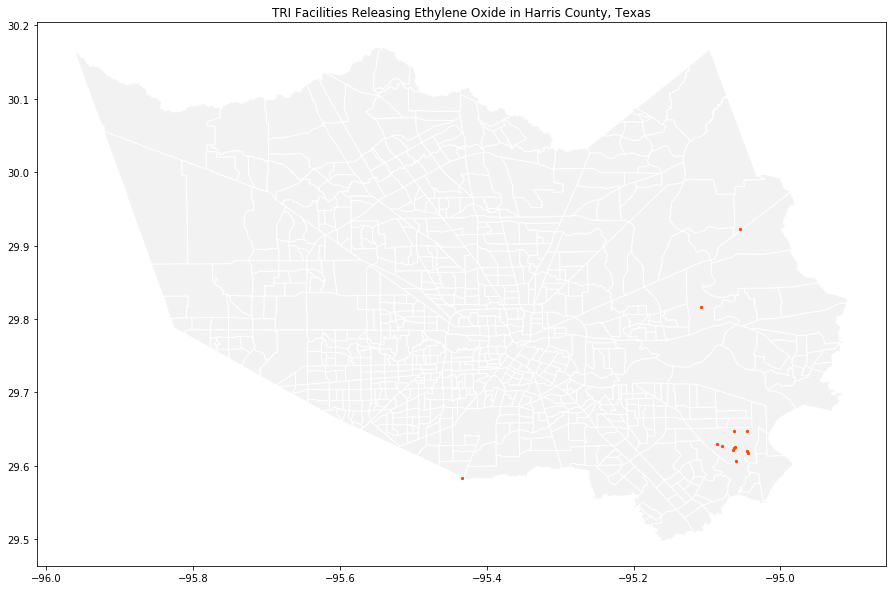

In [144]:
#plot facilties over Harris County census tracts to visualize distribution
tracts = gpd.read_file('../data/texas-tracts-shapefile/tl_2019_48_tract.shp')
harris = tracts[(tracts['STATEFP'] == '48') & (tracts['COUNTYFP'] == '201')]

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

harris.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
gdf.plot(ax=ax, color='orangered', zorder=1, markersize=5);



ax.set(title='TRI Facilities Releasing Ethylene Oxide in Harris County, Texas');

print;

After seeing the cluster of facilities near the southwest border of Harris County, it may be useful to see all ethylene oxide releasing facilities in Texas when looking at NATA data. I am going to re-run the code blocks but select all facilities in Texas this time instead.

In [145]:
# isolate all records that release ethylene oxide in Harris County TX
texas = df.loc[(df['CHEMICAL'] == 'ETHYLENE OXIDE') & (df['ST'] == 'TX')]

# calculate total air release column
texas['TOTAL_AIR_RELEASE'] = texas['FUGITIVE AIR'] + texas['STACK AIR']

# create new dataframe by filtering certain columns
texas_filter = texas.filter(['TRIFD', 'FACILITY NAME', 'STREET ADDRESS', 'CITY', 'COUNTY', 'ST', 'ZIP', 'LATITUDE', 'LONGITUDE', 'INDUSTRY SECTOR', 'TOTAL_AIR_RELEASE', 'ON-SITE RELEASE TOTAL', 'OFF-SITE RELEASE TOTAL', 'TOTAL RELEASES'])
texas_filter.head()

# replace spaces in column names with underscores
texas_filter.columns = texas_filter.columns.str.replace(' ', '_')

# replace dashes in column names with underscores
texas_filter.columns = texas_filter.columns.str.replace('-', '_')

texas_filter.head()

,TRIFD,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,TOTAL_AIR_RELEASE,ON_SITE_RELEASE_TOTAL,OFF_SITE_RELEASE_TOTAL,TOTAL_RELEASES
80,7750WSLVYS5761U,SOLVAY USA INC PASADENA TX PLANT,5761 UNDERWOOD RD SUITE B,PASADENA,HARRIS,TX,77507,29.629010,-95.086940,Chemicals,138.04,138.04,0.00,138.04
172,77530RCCHM2502S,LYONDELL CHEMICAL CO,2502 SHELDON RD,CHANNELVIEW,HARRIS,TX,77530,29.816654,-95.107603,Chemicals,3101.00,3101.00,0.00,3101.00
10276,77978FRMSPPOBOX,FORMOSA PLASTICS CORP TEXAS,201 FORMOSA DR,POINT COMFORT,CALHOUN,TX,77978,28.675300,-96.549500,Chemicals,495.00,495.00,0.00,495.00
10591,77535BKRPRUSHWY,HUNTSMAN PETROCHEMICAL LLC,3892 US HWY 90,DAYTON,LIBERTY,TX,77535,29.999444,-94.952500,Chemicals,640.00,640.00,0.00,640.00
10858,77507QSTRC5761U,EQUISTAR CHEMICALS BAYPORT CHEMICALS PLANT,5761 UNDERWOOD RD,PASADENA,HARRIS,TX,77507,29.627167,-95.080194,Chemicals,13436.00,13436.00,462.15,13898.15


In [146]:
# convert reduced dataframe to geodataframe to visualize facilities
gdf = gpd.GeoDataFrame(harris_filter, geometry=gpd.points_from_xy(harris_filter.LONGITUDE, harris_filter.LATITUDE))

# define crs for geodataframe
gdf.crs = {'init' :'epsg:4326'}

In [149]:
# export TRI facilities to geojson
gdf.to_file("../data/ethylene-oxide-texas.geojson", driver='GeoJSON')

### 2014 National Air Toxics Assessment Data

The EPA developed the [National Air Toxics Assessment](https://www.epa.gov/national-air-toxics-assessment/2014-national-air-toxics-assessment) (NATA) as a screening tool to help agencies identify pollutants, emission sources, and places that may warrant further study to better understand any risks these air toxins pose to public health.

In [87]:
# read data in
df = pd.read_excel('../data/2014-NATA-cancer-risk.xlsx')
df.head()

,State,EPA Region,County,FIPS,Tract,Population,Total Cancer Risk (per million),"1,1,2-TRICHLOROETHANE","1,2-DIBROMO-3-CHLOROPROPANE","1,2-Diphenylhydrazine","1,2,3,4,5,6-HEXACHLOROCYCLYHEXANE","1,3-BUTADIENE","1,3-DICHLOROPROPENE","1,3-PROPANE SULTONE","1,4-DICHLOROBENZENE",2-ACETYLAMINOFLUORENE,2-NITROPROPANE,"2,4-DINITROTOLUENE","2,4-TOLUENE DIISOCYANATE","2,4,6-TRICHLOROPHENOL","3,3'-DICHLOROBENZIDINE",4-DIMETHYLAMINOAZOBENZENE,"4,4'-METHYLENE BIS(2-CHLOROANILINE)","4,4'-METHYLENEDIANILINE",ACETALDEHYDE,ACETAMIDE,ACRYLAMIDE,ACRYLONITRILE,ALLYL CHLORIDE,ANILINE,ARSENIC COMPOUNDS(INORGANIC INCLUDING ARSINE),BENZENE,BENZIDINE,BENZYL CHLORIDE,BERYLLIUM COMPOUNDS,BIS(2-ETHYLHEXYL)PHTHALATE (DEHP),BIS(CHLOROMETHYL) ETHER,BROMOFORM,CHROMIUM VI (HEXAVALENT),CADMIUM COMPOUNDS,CARBON TETRACHLORIDE,CHLORDANE,CHLOROBENZILATE,CHLOROPRENE,COKE OVEN EMISSIONS,DICHLOROETHYL ETHER (BIS[2-CHLOROETHYL]ETHER),EPICHLOROHYDRIN,ETHYLBENZENE,ETHYL CARBAMATE (URETHANE) CHLORIDE (CHLOROETHANE),ETHYLENE DIBROMIDE (DIBROMOETHANE),"ETHYLENE DICHLORIDE (1,2-DICHLOROETHANE)",ETHYLENE OXIDE,ETHYLENE THIOUREA,"ETHYLIDENE DICHLORIDE (1,1-DICHLOROETHANE)",FORMALDEHYDE,HEPTACHLOR,HEXACHLOROBENZENE,HEXACHLOROBUTADIENE,HYDRAZINE,METHYL TERT-BUTYL ETHER,METHYLENE CHLORIDE,N-NITROSODIMETHYLAMINE,N-NITROSOMORPHOLINE,NICKEL COMPOUNDS,NAPHTHALENE,NITROBENZENE,POLYCHLORINATED BIPHENYLS (AROCLORS),PENTACHLOROPHENOL,PROPYLENE OXIDE,TETRACHLOROETHYLENE,"2,4-TOLUENE DIAMINE",TOXAPHENE (CHLORINATED CAMPHENE),TRICHLOROETHYLENE,VINYL BROMIDE,VINYL CHLORIDE,O-TOLUIDINE,"1,4-DIOXANE",PAHPOM
0,US,Entire US,Entire US,0,0,312572412,31.68900,0.00030,0.00049,0.00000,0.00000,0.99730,0.00926,0.00004,0.08707,0.00005,0.00006,0.00024,0.00032,0.00000,0.00000,0.00001,0.00157,0.00049,2.45730,0.00173,0.00277,0.04548,0.00006,0.00017,0.20134,3.10883,0.00659,0.00180,0.02694,0.00040,0.00001,0.00001,0.24888,0.03999,3.18001,0.00000,0.00000,0.04103,0.10053,0.00001,0.00007,0.32659,0.00012,0.01057,0.01245,1.28613,0.00001,0.00054,17.89808,0.00001,0.00026,0.00004,0.00641,0.00014,0.00341,0.00152,0.00000,0.13088,1.20916,0.00068,0.00023,0.00001,0.00145,0.00605,0.00066,0.00000,0.08166,0.00000,0.00612,0.00025,0.00041,0.14402
1,AL,EPA Region 4,Entire State,1000,1000000000,4779690,43.31414,0.00234,0.00002,0.00000,0.00000,0.92325,0.00042,0.00000,0.00252,0.00000,0.00000,0.00002,0.00010,0.00000,0.00000,0.00000,0.00000,0.00000,4.41751,0.00582,0.00053,0.12127,0.00002,0.00029,0.13634,2.75182,0.00000,0.00037,0.00332,0.00044,0.00000,0.00000,0.32283,0.02305,3.17805,0.00000,0.00000,0.00007,0.39775,0.00000,0.00002,0.25276,0.00000,0.01014,0.00622,0.58859,0.00000,0.00018,28.61587,0.00000,0.00011,0.00000,0.00000,0.00003,0.00280,0.00000,0.00000,0.07170,1.26137,0.00031,0.00000,0.00002,0.00014,0.00461,0.00000,0.00000,0.05964,0.00000,0.00286,0.00027,0.00007,0.14828
2,AL,EPA Region 4,Autauga,1001,1001000000,54571,49.51143,0.03198,0.00000,0.00000,0.00000,1.08517,0.00000,0.00000,0.00325,0.00000,0.00000,0.00003,0.00008,0.00001,0.00000,0.00000,0.00000,0.00000,5.60481,0.00131,0.00000,0.01853,0.00000,0.00000,0.12931,2.79011,0.00000,0.00016,0.00259,0.00076,0.00000,0.00000,0.12667,0.01639,3.18127,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,0.22644,0.00000,0.00602,0.00664,0.53214,0.00000,0.00016,33.94220,0.00000,0.00022,0.00000,0.00000,0.00000,0.00337,0.00000,0.00000,0.04385,1.52320,0.00000,0.00000,0.00000,0.00017,0.00531,0.00000,0.00000,0.04833,0.00000,0.00170,0.00000,0.00005,0.17914
3,AL,EPA Region 4,Autauga,1001,1001020100,1912,49.37703,0.02497,0.00000,0.00000,0.00000,1.11337,0.00000,0.00000,0.00327,0.00000,0.00000,0.00003,0.00008,0.00001,0.00000,0.00000,0.00000,0.00000,5.58042,0.00138,0.00000,0.01793,0.00000,0.00000,0.10385,2.58798,0.00000,0.00020,0.00209,0.00081,0.00000,0.00000,0.11230,0.01482,3.18119,0.00000,0.00000,0.00005,0.00000,0.00000,0.00000,0.21688,0.00000,0.00507,0.00616,0.44220,0.00000,0.00019,34.22471,0.00000,0.00024,0.00000,0.00000,0.00000,0.00323,0.00000,0.00000,0.03115,1.47681,0.00000,0.00000,0.00000,0.00017,0.0

This data provides total cancer risk (per million), and risk broken down by pollutant. I am interested in total risk and the risk posed specifically by ethylene oxide. For now I will include all of Texas.

In [113]:
texas = df.loc[(df['State'] == 'TX')]
texas.head()

,State,EPA Region,County,FIPS,Tract,Population,Total Cancer Risk (per million),"1,1,2-TRICHLOROETHANE","1,2-DIBROMO-3-CHLOROPROPANE","1,2-Diphenylhydrazine",...,PROPYLENE OXIDE,TETRACHLOROETHYLENE,"2,4-TOLUENE DIAMINE",TOXAPHENE (CHLORINATED CAMPHENE),TRICHLOROETHYLENE,VINYL BROMIDE,VINYL CHLORIDE,O-TOLUIDINE,"1,4-DIOXANE",PAHPOM
63749,TX,EPA Region 6,Entire State,48000,48000000000,25145472,35.022608,0.000335,0.00036,0.000007,...,0.007504,0.004174,0.007684,0.000038,0.056303,0.0,0.008191,7.413744e-04,0.000430,0.100253
63750,TX,EPA Region 6,Anderson,48001,48001000000,58458,33.963376,0.000067,0.00000,0.000000,...,0.000015,0.003146,0.000000,0.000000,0.014361,0.0,0.001532,2.677218e-07,0.000009,0.080562
63751,TX,EPA Region 6,Anderson,48001,48001950100,4685,34.385852,0.000046,0.00000,0.000000,...,0.000007,0.003099,0.000000,0.000000,0.011704,0.0,0.001295,1.540265e-07,0.000007,0.079355
63752,TX,EPA Region 6,Anderson,48001,48001950401,5422,32.621711,0.000089,0.00000,0.000000,...,0.000014,0.002062,0.000000,0.000000,0.008628,0.0,0.001555,1.439833e-07,0.000005,0.069317
63753,TX,EPA Region 6,Anderson,48001,48001950402,7535,33.033525,0.000118,0.00000,0.000000,...,0.000017,0.003128,0.000000,0.000000,0.011468,0.0,0.001483,9.130882e-08,0.000004,0.071011


In [114]:
# create new dataframe that only has the columns I need
texas_filter = texas.filter(['State', 'County', 'FIPS', 'Tract', 'Population', 'Total Cancer Risk (per million)', 'ETHYLENE OXIDE'])
texas_filter.head()

,State,County,FIPS,Tract,Population,Total Cancer Risk (per million),ETHYLENE OXIDE
63749,TX,Entire State,48000,48000000000,25145472,35.022608,4.112176
63750,TX,Anderson,48001,48001000000,58458,33.963376,1.426331
63751,TX,Anderson,48001,48001950100,4685,34.385852,1.430685
63752,TX,Anderson,48001,48001950401,5422,32.621711,1.026294
63753,TX,Anderson,48001,48001950402,7535,33.033525,1.259695


In [115]:
# inspect Texas census tracts
tracts = gpd.read_file('../data/texas-tracts-shapefile/tl_2019_48_tract.shp')
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,439,121609,48439121609,1216.09,Census Tract 1216.09,G5020,S,4036421,2474977,+32.6893777,-097.2140987,"POLYGON ((-97.23369 32.67175, -97.23366 32.671..."
1,48,187,210708,48187210708,2107.08,Census Tract 2107.08,G5020,S,2625635,0,+29.5747421,-098.2516707,"POLYGON ((-98.26254 29.57872, -98.26236 29.578..."
2,48,201,550301,48201550301,5503.01,Census Tract 5503.01,G5020,S,2840437,680,+29.9841485,-095.4266424,"POLYGON ((-95.43727 29.98103, -95.43709 29.981..."
3,48,201,550302,48201550302,5503.02,Census Tract 5503.02,G5020,S,8876769,28534,+30.0052130,-095.4396816,"POLYGON ((-95.46369 30.00709, -95.45908 30.009..."
4,48,157,675800,48157675800,6758,Census Tract 6758,G5020,S,321634038,4618684,+29.5291745,-095.9737864,"POLYGON ((-96.08885 29.60166, -96.08555 29.601..."


In [117]:
# cast fields I need to join as string
texas_filter['Tract']= texas_filter['Tract'].astype(str)
tracts['GEOID'] = tracts['GEOID'].astype(str)

# join NATA data to census tract geojson with the GEOID field
joined_tracts = pd.merge(tracts, texas_filter, left_on='GEOID', right_on='Tract', how='left')
joined_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,State,County,FIPS,Tract,Population,Total Cancer Risk (per million),ETHYLENE OXIDE
0,48,439,121609,48439121609,1216.09,Census Tract 1216.09,G5020,S,4036421,2474977,+32.6893777,-097.2140987,"POLYGON ((-97.23369 32.67175, -97.23366 32.671...",TX,Tarrant,48439.0,48439121609,6056.0,34.198038,0.584724
1,48,187,210708,48187210708,2107.08,Census Tract 2107.08,G5020,S,2625635,0,+29.5747421,-098.2516707,"POLYGON ((-98.26254 29.57872, -98.26236 29.578...",TX,Guadalupe,48187.0,48187210708,6396.0,30.214419,0.539536
2,48,201,550301,48201550301,5503.01,Census Tract 5503.01,G5020,S,2840437,680,+29.9841485,-095.4266424,"POLYGON ((-95.43727 29.98103, -95.43709 29.981...",TX,Harris,48201.0,48201550301,6600.0,41.628547,4.512128
3,48,201,550302,48201550302,5503.02,Census Tract 5503.02,G5020,S,8876769,28534,+30.0052130,-095.4396816,"POLYGON ((-95.46369 30.00709, -95.45908 30.009...",TX,Harris,48201.0,48201550302,8785.0,40.488660,5.354077
4,48,157,675800,48157675800,6758,Census Tract 6758,G5020,S,321634038,4618684,+29.5291745,-095.9737864,"POLYGON ((-96.08885 29.60166, -96.08555 29.601...",TX,Fort Bend,48157.0,48157675800,3392.0,27.643155,2.370637


In [119]:
joined_tracts_filter = joined_tracts.filter(['NAMELSAD', 'ALAND', 'geometry', 'State', 'County', 'FIPS', 'Tract', 'Population', 'Total Cancer Risk (per million)', 'ETHYLENE OXIDE'])
joined_tracts_filter.head()

,NAMELSAD,ALAND,geometry,State,County,FIPS,Tract,Population,Total Cancer Risk (per million),ETHYLENE OXIDE
0,Census Tract 1216.09,4036421,"POLYGON ((-97.23369 32.67175, -97.23366 32.671...",TX,Tarrant,48439.0,48439121609,6056.0,34.198038,0.584724
1,Census Tract 2107.08,2625635,"POLYGON ((-98.26254 29.57872, -98.26236 29.578...",TX,Guadalupe,48187.0,48187210708,6396.0,30.214419,0.539536
2,Census Tract 5503.01,2840437,"POLYGON ((-95.43727 29.98103, -95.43709 29.981...",TX,Harris,48201.0,48201550301,6600.0,41.628547,4.512128
3,Census Tract 5503.02,8876769,"POLYGON ((-95.46369 30.00709, -95.45908 30.009...",TX,Harris,48201.0,48201550302,8785.0,40.488660,5.354077
4,Census Tract 6758,321634038,"POLYGON ((-96.08885 29.60166, -96.08555 29.601...",TX,Fort Bend,48157.0,48157675800,3392.0,27.643155,2.370637


In [120]:
joined_tracts_rename = joined_tracts_filter.rename(columns = {'NAMELSAD':'name',
                                                             'Total Cancer Risk (per million)':'total_cancer_risk',
                                                             'ETHYLENE OXIDE':'ethylene_oxide_risk'})
joined_tracts_rename.head()

,name,ALAND,geometry,State,County,FIPS,Tract,Population,total_cancer_risk,ethylene_oxide_risk
0,Census Tract 1216.09,4036421,"POLYGON ((-97.23369 32.67175, -97.23366 32.671...",TX,Tarrant,48439.0,48439121609,6056.0,34.198038,0.584724
1,Census Tract 2107.08,2625635,"POLYGON ((-98.26254 29.57872, -98.26236 29.578...",TX,Guadalupe,48187.0,48187210708,6396.0,30.214419,0.539536
2,Census Tract 5503.01,2840437,"POLYGON ((-95.43727 29.98103, -95.43709 29.981...",TX,Harris,48201.0,48201550301,6600.0,41.628547,4.512128
3,Census Tract 5503.02,8876769,"POLYGON ((-95.46369 30.00709, -95.45908 30.009...",TX,Harris,48201.0,48201550302,8785.0,40.488660,5.354077
4,Census Tract 6758,321634038,"POLYGON ((-96.08885 29.60166, -96.08555 29.601...",TX,Fort Bend,48157.0,48157675800,3392.0,27.643155,2.370637


In [121]:
# convert crs to WGS84 for web mapping
joined_tracts_rename = joined_tracts_rename.to_crs(epsg=4326)

# write joined census data to geojson
joined_tracts_rename.to_file("../data/texas-census-tracts.geojson", driver='GeoJSON')